### 1. Libraries and packages
#### Exercise 1
********************
To be able to use some functions we need to load the required packages in our workspace. Run the following cell. 
********************

In [2]:
import os
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import statsmodels.api as sm
from scipy import stats

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
#stats.chi2 - A chi-squared continuous random variable.
#.sf - Survival function (also defined as 1 - cdf (Cumulative distribution function), but sf is sometimes more accurate).

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background  style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### 2. Data Access
#### Exercise 2
********************
Find a function to read the files "train.csv" and "test.csv". Then look at the output of the first 5 lines of the files (_Hint:_ **_DataFrame_.head(...)** may be helpful). What do you notice?
********************

In [4]:
# Get current working directory
#os.getcwd()
# Change directory if required
os.chdir('REPLACE PATH HERE')


#---------------------------------Exercise 2---------------------------------------------------
#get titanic train & test csv files as a DataFrame

#train data 
titanic_train_df = pd.read_csv("Titanic_train.csv")
#test data 
titanic_test_df = pd.read_csv("Titanic_test.csv")

In [4]:
# preview train data
titanic_train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Dictionary 
Here you can find a description of the *columns*.
<br><br>
*survival*: Survival 0 = No, 1 = Yes 
<br>
*pclass*: Ticket class 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)
<br>
*sex*: Sex male/female 
<br>
*Age*: Age in years (is fractional if less than 1)
<br>
*sibsp*: number of siblings (brother, sister, stepbrother, stepsister) / spouses (husband, wife) aboard the Titanic 
<br>
*parch*: number of parents(mother, father) / children (daughter, son, stepdaughter, stepson) aboard the Titanic 
<br>
*ticket*: Ticket number 
<br>
*fare*: Passenger fare 
<br>
*cabin*: Cabin number 
<br>
*embarked*: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# preview test data
titanic_test_df.head(5)
#----------------------------------------------------------------------------------------------

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3. Data Preparation
We want to prepare our data for modeling and analyzing. 
#### Exercise 3.1.
********************
Check the two imported files for the number of so-called NULL values. _Hint:_ You could combine the functions **.isnull()** and **.sum()** for this...
********************

In [6]:
#---------------------------------Exercise 3.1.------------------------------------------------
# check missing values in train dataset
titanic_train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# check missing values in test dataset
titanic_test_df.isnull().sum()
#----------------------------------------------------------------------------------------------

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Exercise 3.2.
********************
To find out how high the proportion of missing values is, you can divide the output by the number of Passengers...( _Hint:_ len() ). 
********************

In [8]:
#---------------------------------Exercise 3.2.------------------------------------------------

# proportion of missing values in the train data
titanic_train_df.isnull().sum()/(len(titanic_train_df["PassengerId"]))
#----------------------------------------------------------------------------------------------

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

#### Cabin 
~77% of records in the column 'Cabin' are missing. It is not wise to replace missing values by any value, so it's better to ignore this variable for prediction. 

#### Exercise 3.3.
********************
Let's drop the variable "Cabin" (see Cheat Sheet) and save teh new dataframe as 'titanic_train_df_adj'.
********************

In [9]:
# drop the variable 'Cabin'
titanic_train_df_adj = titanic_train_df.drop("Cabin", axis = 1)
# alternative
titanic_train_df_adj = titanic_train_df.copy()
titanic_train_df_adj.drop("Cabin", axis = 1, inplace = True)

#### Age
~20% of entries for passenger age and ~0.2% for 'Embarked' are missing. An idea would be to replace the missing values...


#### Exercise 3.4.
********************
Let's see what the 'Age' variable looks like in general. Plot a histogram of the 'Age' variable. What can you say about the distribution of the variable?
********************


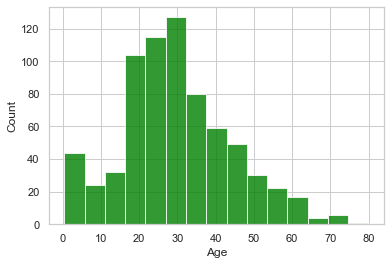

In [10]:
#---------------------------------Exercise 3.4.------------------------------------------------
# histogram of Age
ax = titanic_train_df["Age"].hist(bins=15, color='green', alpha=0.8)

#----------------------------------------------------------------------------------------------
# set axes 
ax.set(xlabel='Age', ylabel='Count')
plt.show()

"Age" is right skewed, so using the mean to replace the NAs might give us biased results. To deal with this, we could use the median..
#### Exercise 3.5.
********************
Compute the mean and the median of the variable and then replace the missing values ( _Hint:_ **mean(), median(), fillna(...)** may help you). 
********************

In [11]:
#---------------------------------Exercise 3.5.------------------------------------------------
# compute mean
titanic_train_df["Age"].mean()

29.69911764705882

In [12]:
# compute median
titanic_train_df["Age"].median()

28.0

In [14]:
# impute with 28 instead of NAs
titanic_train_df_adj["Age"].fillna(28, inplace = True)
#----------------------------------------------------------------------------------------------

#### Embarked
There are only 2 missing values for "Embarked", so we can just impute with the port where most people boarded.
#### Exercise 3.6.
********************
Use the function **value_counts()** to count each value of the 'Embarked' variable. (An alternative could be the function **countplot()** in the package **seaborn** which visualize the counts of the values.) Then replace the missing values with the corresponding value.
********************

In [15]:
#---------------------------------Exercise 3.6.------------------------------------------------
# counts of values 
titanic_train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

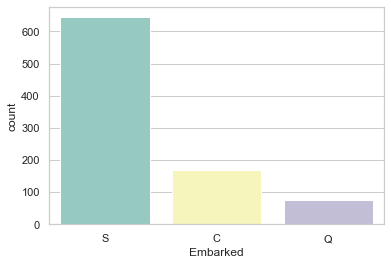

In [16]:
# optional countplot to visualize the counts
sns.countplot(x = "Embarked", data = titanic_train_df, palette = "Set3")
plt.show()

'S' (Southhampton) is the port with the most passengers, so we will set the NAs to 'S'

In [17]:
# impute with 'S' instead of NAs
titanic_train_df_adj["Embarked"].fillna('S', inplace = True)
#----------------------------------------------------------------------------------------------

#### Exercise 3.7.
********************
A) Investigate how the function **np.where()** works. <br>
B) **Create a new variable**
SibSp = number of siblings/ spouses and Parch = number of parents/ children relate to travveling with family. For simplicity's sake let's create a new categorical variable "TravelAlone": whether ("TravelAlone" = 1) or not ("TravelAlone" = 0) that individual was traveling alone. <br> 
C) Drop "SibSp" and "Parch" after creating the new variable.
********************

In [18]:
#---------------------------------Exercise 3.7.------------------------------------------------
# create additional variable for traveling alone
titanic_train_df_adj["TravelAlone"] = np.where(titanic_train_df_adj["SibSp"] + titanic_train_df_adj["Parch"] > 0, 0, 1)

In [19]:
titanic_train_df_adj.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [20]:
# drop SibSp and Parch
titanic_train_df_adj.drop("SibSp", axis = 1 ,inplace = True)
titanic_train_df_adj.drop("Parch", axis = 1 ,inplace = True)
#---------------------------------------------------------------------------------------------

#### Data Transformation
Let's encode nominal variables "Sex" and "Embarked"
#### Exercise 3.8.
********************
We want to create dummy variables from the nominal variables "Sex" and "Embarked". <br> 
A) Since the "Sex" variable has only two values (male and female), we first change the type of the variable to 'category' and then encode the values to 0 and 1 (_Hint_: cat.codes) . Examine how **cat.codes** assign values. <br> 
B) Add a function (_Hint_: cheatsheet may help) to create dummy variables from "Embarked". <br> 
C) Examine the output and drop the unnecessary variables!
********************

In [21]:
#---------------------------------Exercise 3.8.------------------------------------------------
# make a copy of a DataFrame to have the changes in a new version and save the "original" values
titanic_train_df_adj_2 = titanic_train_df_adj.copy()
# A
# change type and encode 'Sex' to 1 = male, 0 = female
titanic_train_df_adj_2["Sex"] = titanic_train_df_adj_2["Sex"].astype('category')
titanic_train_df_adj_2["Sex_code"] = titanic_train_df_adj_2["Sex"].cat.codes

# B
# create dummy variables of 'Embarked' 
titanic_train_df_adj_2 = pd.get_dummies(titanic_train_df_adj_2, columns = ["Embarked"])
# C - examine
titanic_train_df_adj_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,TravelAlone,Sex_code,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,1,1,0,0,1


Drop unnecessary variables

In [22]:
# C - drop
titanic_train_df_adj_2.drop("PassengerId", axis = 1 ,inplace = True)
titanic_train_df_adj_2.drop("Ticket", axis = 1 ,inplace = True)
titanic_train_df_adj_2.drop("Name", axis = 1 ,inplace = True)
titanic_train_df_adj_2.drop("Sex", axis = 1 ,inplace = True)
#---------------------------------------------------------------------------------------------

In [23]:
train_final = titanic_train_df_adj_2
train_final.head(5)

,Survived,Pclass,Age,Fare,TravelAlone,Sex_code,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,0,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,0,0,0,0,1
4,0,3,35.0,8.0500,1,1,0,0,1


#### Exercise 3.9.
********************
Understand the following lines and run the code to make the same changes in **test data** .
********************

In [24]:
#---------------------------------Exercise 3.9.------------------------------------------------
titanic_test_df_adj = titanic_test_df.copy()
titanic_test_df_adj["Age"].fillna(28, inplace = True)
titanic_test_df_adj.drop("Cabin", axis = 1, inplace = True)

In [25]:
# instead of Embarked we have to take a look at the variable "Fare" that has one missing value
# compute mean
titanic_test_df["Fare"].mean(skipna=True)

35.6271884892086

In [26]:
# compute median
titanic_test_df["Fare"].median(skipna=True)

14.4542

In [27]:
titanic_test_df_adj["Fare"].fillna(14.45, inplace = True)

In [28]:
# create additional variable for traveling alone
titanic_test_df_adj["TravelAlone"] = np.where(titanic_test_df_adj["SibSp"]+titanic_test_df_adj["Parch"] > 0, 0, 1)
titanic_test_df_adj.drop("SibSp", axis = 1, inplace = True)
titanic_test_df_adj.drop("Parch", axis = 1, inplace = True)

In [29]:
#titanic_test_df_adj_2 = pd.get_dummies(titanic_test_df_adj, columns = ["Sex", "Embarked", "Pclass"])
titanic_test_df_adj_2 = titanic_test_df_adj.copy()
# change type and encode 'Sex' to 1 = male, 0 = female
titanic_test_df_adj_2["Sex"] = titanic_test_df_adj_2["Sex"].astype('category')
titanic_test_df_adj_2["Sex_code"] = titanic_test_df_adj_2["Sex"].cat.codes
# create dummy variables of 'Embarked' 
titanic_test_df_adj_2 = pd.get_dummies(titanic_test_df_adj_2, columns = ["Embarked"])
# drop unnecessary variables
titanic_test_df_adj_2.drop("PassengerId", axis = 1 ,inplace = True)
titanic_test_df_adj_2.drop("Ticket", axis = 1 ,inplace = True)
titanic_test_df_adj_2.drop("Name", axis = 1 ,inplace = True)
titanic_test_df_adj_2.drop("Sex", axis = 1 ,inplace = True)

test_final = titanic_test_df_adj_2
test_final.head(5)
#--------------------------------------------------------------------------------------------------

,Pclass,Age,Fare,TravelAlone,Sex_code,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,1,0,1,0
1,3,47.0,7.0000,0,0,0,0,1
2,2,62.0,9.6875,1,1,0,1,0
3,3,27.0,8.6625,1,1,0,0,1
4,3,22.0,12.2875,0,0,0,0,1


### 4. Exploratory Data Analysis
#### Exercise 4.1.
********************
We want to plot the distribution of 'Age' conditioned 'Survived = yes' or 'Survived = no'. 
<br> <br>
A) Add missing information and then run the code. What can you say about the age distribution? <br>
B) Add a barplot (package seaborn). What do you notice? <br>
C) Create a new dummy variable "Is_Minor" where the value is set to 1 if the passenger is under 16. 
********************
#### Age 

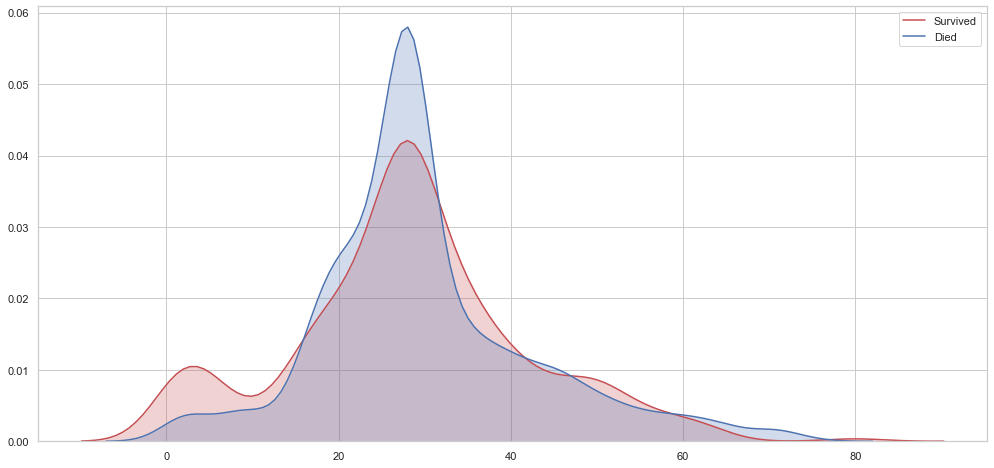

In [30]:
plt.figure(figsize = (17,8))
#---------------------------------Exercise 4.1.------------------------------------------------
# A
sns.kdeplot(train_final["Age"][train_final.Survived == 1], color = 'r', shade = True)
sns.kdeplot(train_final["Age"][train_final.Survived == 0], color = 'b', shade = True)

plt.legend(['Survived', 'Died'])
plt.show()

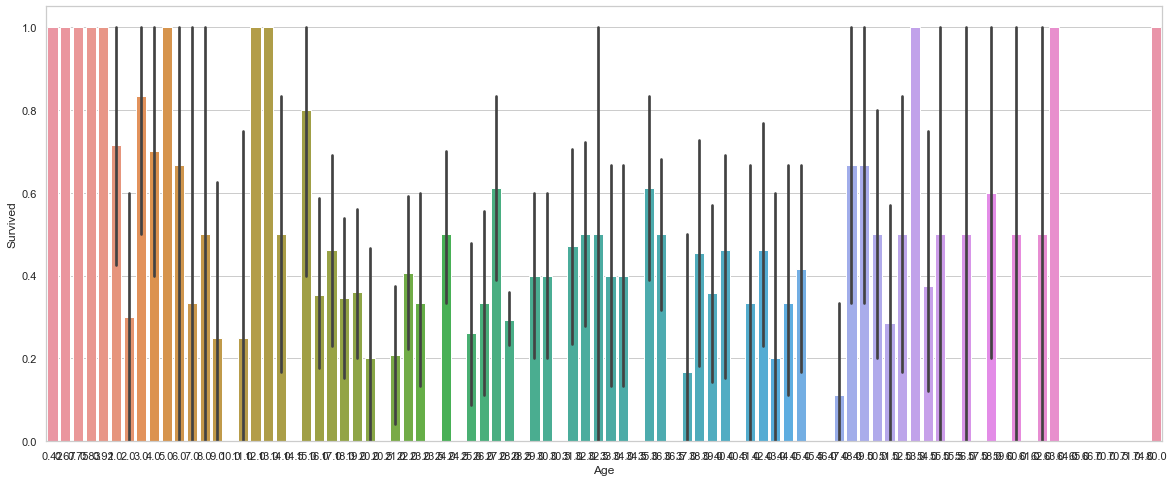

In [31]:
# B
plt.figure(figsize = (20,8))
sns.barplot(x='Age', y = 'Survived', data = train_final)
plt.show()

Considering the survival rate of passengers under 16, we will include another categorical variable in our dataset: "Is_Minor"

In [32]:
# C
# add a variable 'Minor', which is set to 1 if the person is under 16
train_final['Is_Minor'] = np.where(train_final['Age']<=16, 1, 0)
test_final['Is_Minor'] = np.where(test_final['Age']<=16, 1, 0)
#----------------------------------------------------------------------------------------------

#### Fare
#### Exercise 4.2
********************
Plot the distribution of 'Fare' conditioned 'Survived = yes' or 'Survived = no'. Add missing information and then run the code. What can you say about the distribution of 'Fare'? 
********************

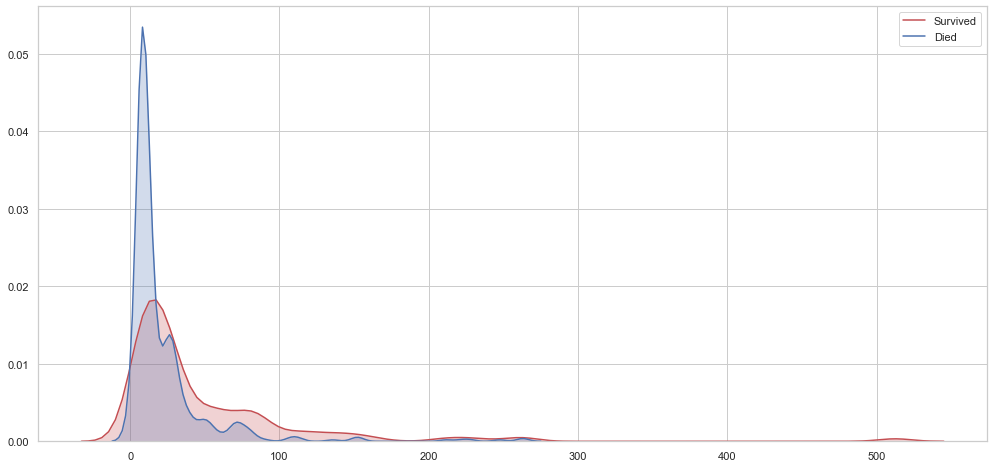

In [33]:
#---------------------------------Exercise 4.2.------------------------------------------------
plt.figure(figsize = (17,8))
sns.kdeplot(train_final["Fare"][train_final.Survived == 1], color = 'r', shade = True)
sns.kdeplot(train_final["Fare"][train_final.Survived == 0], color = 'b', shade = True)
plt.legend(['Survived', 'Died'])
plt.show()
#----------------------------------------------------------------------------------------------

As the distributions are different, it's likely that 'Fare' would be a significant predictor in our model. Passengers with lower fares seem to have been less likely to survive. 

#### Passenger Class 
#### Exercise 4.3
********************
Let's check if there is a correlation with the Passenger Class with a cross table. Add missing information and run the code! What can you see?
********************

In [34]:
#---------------------------------Exercise 4.3.------------------------------------------------
pd.crosstab(train_final["Pclass"], train_final["Survived"], margins = True, normalize = 'index')
#----------------------------------------------------------------------------------------------

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


As expected, it was safest to be a first class passenger.

#### Embarked
#### Exercise 4.4.
********************
Explore if there is any correlation with Port of Embarkation ('Embarked')... Add missing information and run the code! What can you see?
********************

In [35]:
#---------------------------------Exercise 4.4.------------------------------------------------
pd.crosstab(titanic_train_df_adj["Embarked"], train_final["Survived"], margins = True, normalize = 'index' )
#----------------------------------------------------------------------------------------------

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009
All,0.616162,0.383838


Passengers who boarded in Cherbourg, France, appear to have the highest survival rate.

#### TravelAlone
#### Exercise 4.5.
********************
Investigate if there is any difference between traveling alone and with family ... Add missing information and run the code! What can you see?
********************

In [36]:
#---------------------------------Exercise 4.5.------------------------------------------------
pd.crosstab(train_final["TravelAlone"], train_final["Survived"], margins = True, normalize = 'index' )
#----------------------------------------------------------------------------------------------

Survived,0,1
TravelAlone,,
0,0.494350,0.505650
1,0.696462,0.303538
All,0.616162,0.383838


Traveling with the family appears to be safer than traveling alone.

#### Gender
#### Exercise 4.6.
********************
Investigate if there is any difference between men and women ... Add missing information and run the code! What can you see? Use here a barplot below to visualize the values.
********************

In [37]:
#---------------------------------Exercise 4.5.------------------------------------------------
pd.crosstab(titanic_train_df_adj["Sex"], train_final["Survived"], margins = True, normalize = 'index' )

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


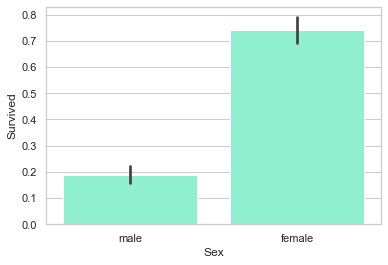

In [38]:
# Let's use here a barplot for visualization
sns.barplot('Sex', 'Survived', data = titanic_train_df_adj, color="aquamarine")
plt.show()
#----------------------------------------------------------------------------------------------

There is a very obvious difference -  being female strongly increased your chance to survive.

### 5. Data Analysis

We will use a logistic regression to predict the likelihood of survival using the train_final dataset for the training. 

In [39]:
train_final.head(5)

,Survived,Pclass,Age,Fare,TravelAlone,Sex_code,Embarked_C,Embarked_Q,Embarked_S,Is_Minor
0,0,3,22.0,7.2500,0,1,0,0,1,0
1,1,1,38.0,71.2833,0,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,0
3,1,1,35.0,53.1000,0,0,0,0,1,0
4,0,3,35.0,8.0500,1,1,0,0,1,0


#### Exercise 5.1.
********************
Add the missing information and run the code lines. <br><br>
A) For your first model we suggest to select the following <br>
independent variables: "Pclass", "Age", "Fare", "TravelAlone", "Sex_code", "Embarked_C", "Embarked_Q", "Is_Minor" <br>
and the following dependent/target variable: "Survived" .<br>
B) Use the **Logit(...)** function from package we called **sm** to build the model. <br>
C) Take a look at the output (_Hint:_ **summary()**): In the column'P >|z|' you find the p-values for the variables. Which variables are significant at the 0.05 alpha level (p < 0.05)?
********************

In [40]:
#---------------------------------Exercise 5.1.------------------------------------------------
# select variables for your first model
# A
cols = ["Pclass", "Age", "Fare", "TravelAlone", "Sex_code", "Embarked_C","Embarked_Q", "Is_Minor"]
X_1 = train_final[cols]
# set the target variable
Y_1 = train_final['Survived']
# B
# logistic regression model 
logit_model_1 = sm.Logit(Y_1,X_1)
# fit the best model
result_1 = logit_model_1.fit()
# C
print(result_1.summary())
#----------------------------------------------------------------------------------------------

Optimization terminated successfully.
         Current function value: 0.479570
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Wed, 09 Oct 2019   Pseudo R-squ.:                  0.2798
Time:                        22:54:31   Log-Likelihood:                -427.30
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.499e-68
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Pclass         -0.3039      0.078     -3.888      0.000      -0.457      -0.151
Age             0.0204    

#### Exercise 5.2.
********************
Run the following cell to compute the prediction score. 
********************

In [41]:
#---------------------------------Exercise 5.2.------------------------------------------------
# predict train labels
logreg = LogisticRegression()
logreg.fit(X_1, Y_1)
logreg.score(X_1, Y_1)
#----------------------------------------------------------------------------------------------

C:\Users\TeamGrundschule\Documents\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8002244668911336

#### Exercise 5.3.
********************
We will test the 80 - 20 cross validation. <br> 
A) Split your **labeled** data into train and test data (_Hint:_ Function **train_test_split(...)**). <br> 
B) Use the same columns for your prediction. <br> 
C) Compute the model score after training <br> 
D) Test the model with the test values you created in A) <br> 
********************


In [42]:
#---------------------------------Exercise 5.3.------------------------------------------------
# A
train, test = train_test_split(train_final, test_size=0.2)
# B
cols = ["Pclass", "Age", "Fare", "TravelAlone", "Sex_code", "Embarked_C", "Embarked_Q", "Is_Minor"]
X_2 = train[cols]
Y_2 = train['Survived']
logit_model_2 = sm.Logit(Y_2,X_2)
result_2 = logit_model_2.fit()
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 0.465325
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Wed, 09 Oct 2019   Pseudo R-squ.:                  0.2974
Time:                        22:54:43   Log-Likelihood:                -331.31
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 8.963e-57
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Pclass         -0.3784      0.089     -4.260      0.000      -0.552      -0.204
Age             0.0287    

In [43]:
# C
logreg.fit(X_2, Y_2)
logreg.score(X_2, Y_2)

0.8160112359550562

In [44]:
# D
#predict test labels
X_2_test = test[cols]
Y_2_test = test['Survived']
Y_2_test_pred = logreg.predict(X_2_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_2_test, Y_2_test)))
#----------------------------------------------------------------------------------------------

Accuracy of logistic regression classifier on test set: 0.78


The model's out of sample performance show similar results.

#### Random Forest with 100 trees
#### Exercise 5.4.
********************
A) Run the following lines to build a Random Forest model for prediction. <br>
B) Predict for the test values and count how many people would survive according to these values. (We have only unlabeled test data, so we can't use it to compute the accuracy.)
********************

In [45]:
#---------------------------------Exercise 5.4.------------------------------------------------
# A
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_2, Y_2)
random_forest.score(X_2, Y_2)

0.9873595505617978

In [46]:
random_forest.score(test[cols], test['Survived'])

0.8044692737430168

In [47]:
# B
# predict for the test values
Y_pred_RF = random_forest.predict(test[cols])
Y_pred_RF_0_1 = np.where(Y_pred_RF <= 0.5, 0, 1)
pd.Series(Y_pred_RF_0_1).value_counts()
#----------------------------------------------------------------------------------------------

0    120
1     59
dtype: int64

#### Decision Tree
Compare the results with a decision tree.
#### Exercise 5.5.
********************
A) Run the following lines to build a Decision tree model for prediction. <br>
B) Predict for the test values and count how many people would survive according to these values. (We have only unlabeled test data, so we can't use it to compute the accuracy.) <br>
********************

In [48]:
# A
tree_1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)
tree_1.fit(X_2, Y_2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
# B
Y_pred_DT = tree_1.predict(test_final[cols])
Y_pred_DT_0_1 = np.where(Y_pred_DT <= 0.5, 0, 1)
pd.Series(Y_pred_DT_0_1).value_counts()

0    266
1    152
dtype: int64